In [65]:
%matplotlib inline
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()

import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.optim import Optimizer


import collections
import h5py, sys
import gzip
import os
import math

import pandas as pd

try:
    import cPickle as pickle
except:
    import pickle
    

from __future__ import print_function
from __future__ import division
import time
import torch.utils.data
from torchvision import transforms, datasets
import torchvision
import matplotlib



In [3]:
  prob =np.array([[0.465806  , 0.53419405], 
   [0.9888601 , 0.01114002], 
   [0.6711221 , 0.32887796], 
   [0.40572345, 0.5942766 ], 
   [0.98888296, 0.01111703], 
   [0.85767746, 0.14232251], 
   [0.8763024 , 0.12369758], 
   [0.5887916 , 0.41120845], 
   [0.5223993, 0.4776007], 
   [0.7322882, 0.2677118], 
   [9.9945438e-01, 5.4564816e-04], 
   [0.86110246, 0.13889752], 
   [0.10729533, 0.8927047 ], 
   [0.83759785, 0.16240224], 
   [0.40203065, 0.59796935], 
   [0.83103496, 0.1689651 ], 
   [0.7804201 , 0.21957992], 
   [0.75174725, 0.24825281], 
   [0.5626326 , 0.43736744], 
   [0.26007703, 0.73992294], 
   [0.7522275 , 0.24777256], 
   [0.8150275 , 0.18497251], 
   [0.9394568 , 0.06054323], 
   [0.3017424, 0.6982576], 
   [0.735456  , 0.26454395], 
   [0.8098263 , 0.19017377], 
   [0.548762, 0.451238], 
   [0.91283786, 0.08716216], 
   [0.8632867 , 0.13671333], 
   [0.17996337, 0.82003665], 
   [0.6645989 , 0.33540115], 
   [0.6749784 , 0.32502162], 
   [0.36419266, 0.63580734], 
   [0.59154797, 0.40845206], 
   [0.47164232, 0.5283577 ], 
   [0.7807414 , 0.21925864], 
   [0.7670629, 0.2329371], 
   [0.8342236 , 0.16577646], 
   [9.999923e-01, 7.742420e-06], 
   [0.9074339 , 0.09256606], 
   [0.5053721 , 0.49462786], 
   [0.6167486 , 0.38325146], 
   [0.03466043, 0.96533966], 
   [0.04351906, 0.9564809 ], 
   [0.47608763, 0.52391243], 
   [0.40505564, 0.59494436], 
   [0.13869835, 0.8613017 ], 
   [0.0952946, 0.9047054], 
   [0.37599862, 0.6240014 ], 
   [0.36807698, 0.6319231 ], 
   [0.6234543 , 0.37654573], 
   [0.5193754 , 0.48062465], 
   [0.17265013, 0.8273499 ], 
   [0.1186603, 0.8813397], 
   [0.07267519, 0.9273248 ], 
   [0.07620959, 0.9237904 ], 
   [0.51473016, 0.48526984], 
   [0.0333318, 0.9666682], 
   [0.43125188, 0.5687482 ], 
   [0.8375948, 0.1624052], 
   [0.96712816, 0.03287186], 
   [0.42588308, 0.574117  ], 
   [0.09282975, 0.9071703 ], 
   [0.04520745, 0.9547926 ], 
   [0.26500627, 0.7349937 ], 
   [0.06264117, 0.9373588 ], 
   [0.3328508, 0.6671492], 
   [0.39692062, 0.6030793 ], 
   [0.2281359, 0.7718642], 
   [0.17959419, 0.82040584], 
   [0.16397604, 0.836024  ], 
   [0.10727854, 0.8927216 ], 
   [0.8217372 , 0.17826286], 
   [0.6866458 , 0.31335425], 
   [0.10671884, 0.89328116], 
   [0.8332774 , 0.16672258], 
   [0.01111112, 0.9888889 ], 
   [0.549664, 0.450336], 
   [0.50501716, 0.49498287], 
   [0.4105179, 0.5894821]])

In [6]:
print(prob[0])

[0.465806   0.53419405]


In [93]:
prob.shape

(80, 2)

In [40]:
thres = 0.4
#prob over thres = covid

In [41]:
y_pred=[]
for i in range(0,prob.shape[0]):
    if prob[i][1] >= thres:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred = np.array(y_pred)

In [42]:
y_pred_arg = np.array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1])
print(y_pred)
print(y_pred_arg)

[1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1]
[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 0 1]


In [43]:
y_true = np.append(np.zeros(40),np.ones(40))

[[26 14]
 [ 7 33]]
[26 14  7 33]


Text(66.5, 0.5, 'True')

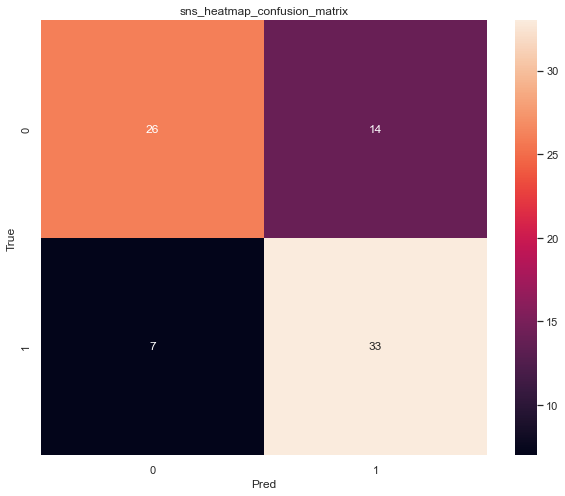

In [44]:
sns.set()

f, ax2 = plt.subplots(figsize = (10, 8),nrows=1)

C2= confusion_matrix(y_true, y_pred, labels=[0, 1])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)

ax2.set_title('sns_heatmap_confusion_matrix')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')

In [45]:
print(tn, fp, fn, tp)

26 14 7 33


In [46]:
"Accuracy: "+str(round((tp+tn)/(tp+fp+fn+tn), 3))

'Accuracy: 0.738'

In [61]:
thres = np.arange(0,1,0.01)
thres.shape

(100,)

Text(0.5, 0, 'threshold')

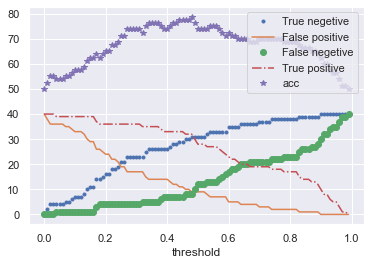

In [62]:
tnl=[]
fpl=[]
fnl=[]
tpl=[]
acc=[]
y_true = np.append(np.zeros(40),np.ones(40))
for j in range(0, thres.shape[0]):
    y_pred=[]
    for i in range(0,prob.shape[0]):
        if prob[i][1] >= thres[j]:
            y_pred.append(1)
        else:
            y_pred.append(0)
    y_pred = np.array(y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    tnl.append(tn)
    fpl.append(fp)
    fnl.append(fn)
    tpl.append(tp)
    acc.append(round((tp+tn)/(tp+fp+fn+tn), 3))
    
    
tnl = np.array(tnl)
fpl = np.array(fpl)
fnl = np.array(fnl)
tpl = np.array(tpl)
acc = np.array(acc)

plt.plot(thres, tnl, '.')
plt.plot(thres, fpl, '-')
plt.plot(thres, fnl, 'o')
plt.plot(thres, tpl, '-.')
plt.plot(thres, acc*100, '*')
plt.legend(['True negetive', 'False positive','False negetive','True positive', 'acc'])
plt.xlabel("threshold")




In [63]:
acc

array([0.5  , 0.525, 0.55 , 0.55 , 0.538, 0.538, 0.538, 0.55 , 0.55 ,
       0.562, 0.575, 0.575, 0.575, 0.588, 0.612, 0.625, 0.625, 0.638,
       0.625, 0.638, 0.65 , 0.65 , 0.675, 0.675, 0.688, 0.712, 0.712,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.725, 0.75 , 0.762, 0.762,
       0.762, 0.762, 0.75 , 0.738, 0.738, 0.75 , 0.762, 0.762, 0.775,
       0.775, 0.775, 0.775, 0.788, 0.762, 0.738, 0.738, 0.738, 0.738,
       0.75 , 0.75 , 0.75 , 0.738, 0.725, 0.712, 0.725, 0.712, 0.712,
       0.7  , 0.7  , 0.7  , 0.7  , 0.688, 0.688, 0.688, 0.7  , 0.7  ,
       0.7  , 0.7  , 0.7  , 0.7  , 0.7  , 0.7  , 0.688, 0.688, 0.688,
       0.688, 0.688, 0.675, 0.662, 0.662, 0.662, 0.65 , 0.65 , 0.638,
       0.625, 0.6  , 0.6  , 0.575, 0.562, 0.562, 0.538, 0.512, 0.512,
       0.5  ])

In [88]:
mat = np.array([acc, thres, fnl])


In [89]:
c=np.where(acc==np.max(acc))
#d=np.where(fpl==np.max(fpl))

#thres[c]
#thres[d]
print(c)
#print(d)
print(thres[c])
print(fnl[c])

(array([48], dtype=int64),)
[0.48]
[8]


In [90]:
mat = pd.DataFrame(mat)

In [91]:
pd.set_option('display.max_columns', None) 

In [92]:
mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.5,0.525,0.55,0.55,0.538,0.538,0.538,0.55,0.55,0.562,0.575,0.575,0.575,0.588,0.612,0.625,0.625,0.638,0.625,0.638,0.65,0.65,0.675,0.675,0.688,0.712,0.712,0.738,0.738,0.738,0.738,0.738,0.725,0.75,0.762,0.762,0.762,0.762,0.75,0.738,0.738,0.75,0.762,0.762,0.775,0.775,0.775,0.775,0.788,0.762,0.738,0.738,0.738,0.738,0.75,0.75,0.75,0.738,0.725,0.712,0.725,0.712,0.712,0.70,0.70,0.70,0.70,0.688,0.688,0.688,0.7,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.688,0.688,0.688,0.688,0.688,0.675,0.662,0.662,0.662,0.65,0.65,0.638,0.625,0.60,0.60,0.575,0.562,0.562,0.538,0.512,0.512,0.50
1,0.0,0.010,0.02,0.03,0.040,0.050,0.060,0.07,0.08,0.090,0.100,0.110,0.120,0.130,0.140,0.150,0.160,0.170,0.180,0.190,0.20,0.21,0.220,0.230,0.240,0.250,0.260,0.270,0.280,0.290,0.300,0.310,0.320,0.33,0.340,0.350,0.360,0.370,0.38,0.390,0.400,0.41,0.420,0.430,0.440,0.450,0.460,0.470,0.480,0.490,0.500,0.510,0.520,0.530,0.54,0.55,0.56,0.570,0.580,0.590,0.600,0.610,0.620,0.63,0.64,0.65,0.66,0.670,0.680,0.690,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.780,0.790,0.800,0.810,0.820,0.830,0.840,0.850,0.860,0.87,0.88,0.890,0.900,0.91,0.92,0.930,0.940,0.950,0.960,0.970,0.980,0.99
2,0.0,0.000,0.00,0.00,1.000,1.000,1.000,1.00,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,4.000,4.000,4.00,4.00,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,5.000,5.00,5.000,5.000,5.000,5.000,6.00,7.000,7.000,7.00,7.000,7.000,7.000,7.000,8.000,8.000,8.000,10.000,12.000,12.000,12.000,13.000,13.00,13.00,13.00,14.000,15.000,16.000,17.000,18.000,18.000,19.00,20.00,20.00,20.00,21.000,21.000,21.000,21.0,21.00,21.00,21.00,22.00,22.00,22.00,22.00,23.000,23.000,23.000,23.000,23.000,25.000,26.000,26.000,26.000,27.00,27.00,28.000,30.000,32.00,32.00,34.000,35.000,35.000,37.000,39.000,39.000,40.00


In [100]:
import numpy as np

def point_distance_line(point,line_point1,line_point2):
	#计算向量
    vec1 = line_point1 - point
    vec2 = line_point2 - point
    distance = np.abs(np.cross(vec1,vec2)) / np.linalg.norm(line_point1-line_point2)
    return distance

point = np.array([0, 2])
line_point1 = np.array([0,0])
line_point2 = np.array([2,2])
# print(get_distance_from_point_to_line(point,line_point1,line_point2))
print(point_distance_line(point,line_point1,line_point2))

1.414213562373095
